In [1]:
%reload_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

import pandas as pd

In [3]:
bs = 64

In [4]:
path = untar_data(URLs.CARS); path

PosixPath('/Users/mgbvox/.fastai/data/stanford-cars')

In [5]:
path.ls()

[PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/.DS_Store'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_annos.mat'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_test')]

In [58]:
import os

[PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/.DS_Store'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_annos.mat'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_test')]

In [6]:
(path/'cars_train').ls()[:10]

[PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/04354.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/02725.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/07885.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/06543.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/00132.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/00654.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/06225.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/02043.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/04432.jpg'),
 PosixPath('/Users/mgbvox/.fastai/data/stanford-cars/cars_train/02057.jpg')]

In [14]:
!open /Users/mgbvox/.fastai/data/stanford-cars/

In [7]:
train_imgs = get_image_files(path/'cars_train')

In [8]:
val_imgs = get_image_files(path/'cars_test')

In [129]:
from scipy.io import loadmat
annot_raw = loadmat(path/'cars_annos.mat')
annot = pd.DataFrame.from_records(annot_raw['annotations'].ravel())

In [130]:
def extract_from_list(l):
    if type(l) in [list, np.ndarray, np.array]:
        return extract_from_list(l[0])
    else:
        return l

In [131]:
annot = annot.applymap(extract_from_list)

In [132]:
annot.head()

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
0,car_ims/000001.jpg,112,7,853,717,1,0
1,car_ims/000002.jpg,48,24,441,202,1,0
2,car_ims/000003.jpg,7,4,277,180,1,0
3,car_ims/000004.jpg,33,50,197,150,1,0
4,car_ims/000005.jpg,5,8,83,58,1,0


In [133]:
BASE_PATH = pathlib.PosixPath(os.path.join(os.environ['HOME'], '.fastai/data/'))
CARS_PATH = BASE_PATH/'stanford-cars'
TRAIN_PATH = CARS_PATH/'cars_train'
TEST_PATH = CARS_PATH/'cars_test'

train_imgs = get_image_files(TRAIN_PATH)
test_imgs = get_image_files(TEST_PATH)

In [138]:
def parse_fnames(r):
    fname = r['relative_im_path'].split('/')[-1]
    if bool(r['test']):
        r['relative_im_path'] = TEST_PATH/fname
    else:
        r['relative_im_path'] = TRAIN_PATH/fname
    return r
annot = annot.apply(parse_fnames, axis=1)

In [140]:
annot.relative_im_path.apply(os.path.exists)

array([False])

In [39]:
label_names = pd.Series(annot_raw['class_names'].ravel()).apply(extract_from_list)

0            AM General Hummer SUV 2000
1                   Acura RL Sedan 2012
2                   Acura TL Sedan 2012
3                  Acura TL Type-S 2008
4                  Acura TSX Sedan 2012
                     ...               
191    Volkswagen Beetle Hatchback 2012
192            Volvo C30 Hatchback 2012
193                Volvo 240 Sedan 1993
194                 Volvo XC90 SUV 2007
195       smart fortwo Convertible 2012
Length: 196, dtype: object

In [51]:
train_paths = get_image_files(path/'cars_train')
test_paths = get_image_files(path/'cars_test')

In [52]:
train_names = [i.name for i in train_paths]
test_names = [i.name for i in test_paths]

In [55]:
len(set(test_names).intersection(set(train_names)))

8041

In [57]:
len(test_paths)

8041

In [117]:
def process_train_data(annot_raw):
    annotations = np.transpose(annot_raw['annotations'])

    fnames = []
    class_ids = []
    labels = []
    test_or_train = []

    for annotation in annotations:

        class_id = annotation[0][-2][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][0][0].split('/')[-1]
        test = annotation[0][-1][0][0]
        test_or_train.append(test)
        class_ids.append(class_id)
        fnames.append(fname)

    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)
    
    processed = pd.DataFrame.from_records(list(zip(fnames, class_ids, labels, test_or_train)))
    processed.
    
    #save_train_data(fnames, labels, bboxes)
    return fnames, class_ids, labels, test_or_train

    

In [118]:
fnames, class_ids, labels, test_or_train = process_train_data(annot_raw)
annot_proc = 

[  1   2   3   4 ... 193 194 195 196]
The number of different cars is 196


,0,1,2,3
0,000001.jpg,1,0001,0
1,000002.jpg,1,0001,0
2,000003.jpg,1,0001,0
3,000004.jpg,1,0001,0
4,000005.jpg,1,0001,0
...,...,...,...,...
16180,016181.jpg,196,0196,1
16181,016182.jpg,196,0196,1
16182,016183.jpg,196,0196,1
16183,016184.jpg,196,0196,1


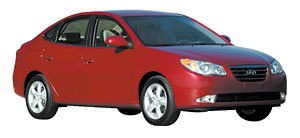

In [108]:
open_image(VAL_PATH/'04354.jpg')

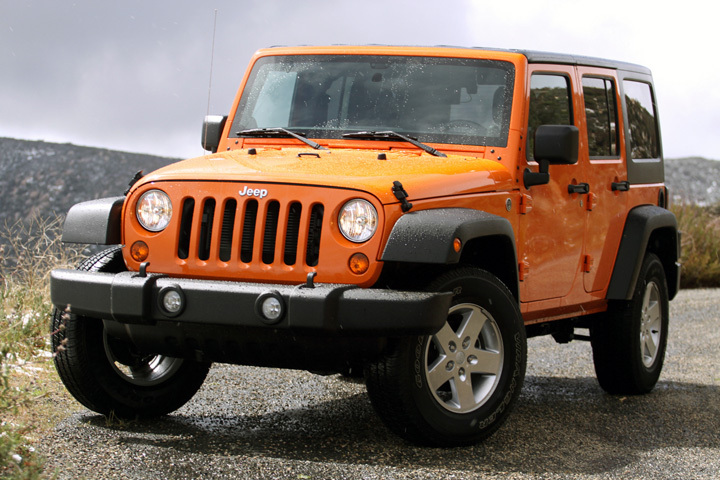

In [109]:
open_image(TRAIN_PATH/'04354.jpg')